In [1]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.Input(shape=(150, 150, 3)))
model.add(keras.layers.Conv2D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/cats_and_dogs/train'
                                                   , target_size=(150, 150)
                                                   , batch_size=20
                                                   , class_mode='binary')
validation_generator = val_datagen.flow_from_directory('data/cats_and_dogs/test'
                                                      , target_size=(150, 150)
                                                   , batch_size=20
                                                   , class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath = 'model/dogs_vs_cats.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [8]:
history = model.fit(train_generator, epochs=50, validation_data=validation_generator,
                   callbacks=[checkpointer, early_stopping])

Epoch 1/50
1000/1000 [==============================] - ETA: 0s - loss: 0.6607 - accuracy: 0.5929
Epoch 1: val_loss improved from inf to 0.63918, saving model to model\dogs_vs_cats.hdf5
1000/1000 [==============================] - 275s 275ms/step - loss: 0.6607 - accuracy: 0.5929 - val_loss: 0.6392 - val_accuracy: 0.6412
Epoch 2/50
1000/1000 [==============================] - ETA: 0s - loss: 0.5509 - accuracy: 0.7243
Epoch 2: val_loss improved from 0.63918 to 0.46702, saving model to model\dogs_vs_cats.hdf5
1000/1000 [==============================] - 134s 133ms/step - loss: 0.5509 - accuracy: 0.7243 - val_loss: 0.4670 - val_accuracy: 0.7778
Epoch 3/50
1000/1000 [==============================] - ETA: 0s - loss: 0.4607 - accuracy: 0.7822
Epoch 3: val_loss improved from 0.46702 to 0.41853, saving model to model\dogs_vs_cats.hdf5
1000/1000 [==============================] - 131s 131ms/step - loss: 0.4607 - accuracy: 0.7822 - val_loss: 0.4185 - val_accuracy: 0.8054
Epoch 4/50
1000/1000 [=

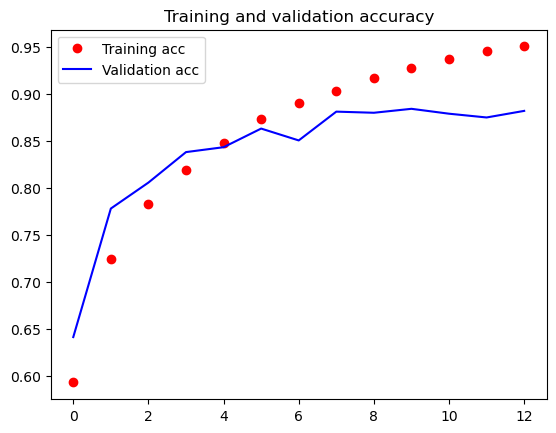

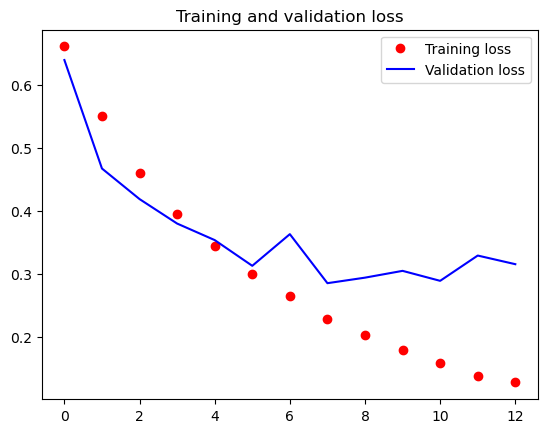

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
import numpy as np

In [18]:
model = models.load_model('model/dogs_vs_cats.hdf5')

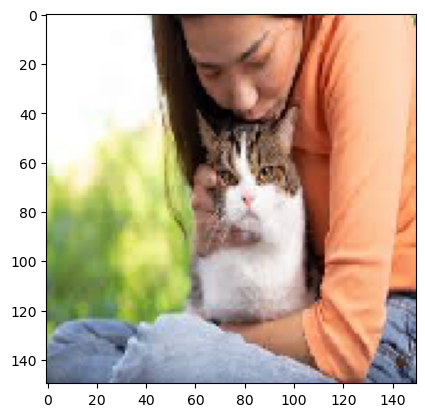

1/1 [==============================] - 0s 14ms/step
prediction: 0.00
It's cat!


In [31]:
img_path = 'data/cat_04.jpg'
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img).astype(float) / 255 #numpy 배열로 바꿔줌
img_batch = np.expand_dims(img_array, axis=0) #2차원 배열로 변경
prediction = model.predict(img_batch)
prediction = prediction.flatten()

print("prediction: %.2f" % prediction[0])

if prediction[0] < 0.5:
    print("It's cat!")
else:
    print("It's dog!")